## Exploratory Analysis of Email Marketing Dataset
Data Source: [Email Campaign Management for SME](https://www.kaggle.com/loveall/email-campaign-management-for-sme)

In [39]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

In [40]:
pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')
sns.set()

Loading dataset

In [3]:
df = pd.read_csv("data/Train_psolI3n.csv")
df.set_index("Email_ID", inplace=True)

Lets look at a random sample first

In [16]:
df.sample(5)

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
Email_ID,,,,,,,,,,,
EMA00084563193270,1,2.00,2,G,2,29.00,1,806,11.00,4.00,0
EMA00084780660260,2,2.00,1,G,2,20.00,2,578,6.00,0.00,0
EMA00084786955540,1,2.00,1,NaN,2,30.00,2,470,4.00,0.00,1
EMA00081663150830,1,1.80,1,D,2,45.00,2,132,9.00,0.00,1
EMA00081051677400,2,1.40,1,E,2,nan,2,251,6.00,0.00,0


It seems that the data is aggregated for a single user and doesnt have any time series. However there is _'Time Email Sent'_ feature.

Lets first check if the users are unqiue in records and its dimensions.

In [19]:
df.index.is_unique, df.shape

(True, (68353, 11))

We can now deduce that we have about 68k unique users with 11 features in this dataset.

Lets explore further about the features.

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Email_Type,"68,353.00",NaN,NaN,NaN,1.29,0.45,1.00,1.00,1.00,2.00,2.00
Subject_Hotness_Score,"68,353.00",NaN,NaN,NaN,1.10,1.00,0.00,0.20,0.80,1.80,5.00
Email_Source_Type,"68,353.00",NaN,NaN,NaN,1.46,0.50,1.00,1.00,1.00,2.00,2.00
Customer_Location,56758,7,G,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Email_Campaign_Type,"68,353.00",NaN,NaN,NaN,2.27,0.47,1.00,2.00,2.00,3.00,3.00
Total_Past_Communications,"61,528.00",NaN,NaN,NaN,28.93,12.54,0.00,20.00,28.00,38.00,67.00
Time_Email_sent_Category,"68,353.00",NaN,NaN,NaN,2.00,0.63,1.00,2.00,2.00,2.00,3.00
Word_Count,"68,353.00",NaN,NaN,NaN,699.93,271.72,40.00,521.00,694.00,880.00,"1,316.00"
Total_Links,"66,152.00",NaN,NaN,NaN,10.43,6.38,1.00,6.00,9.00,14.00,49.00
Total_Images,"66,676.00",NaN,NaN,NaN,3.55,5.60,0.00,0.00,0.00,5.00,45.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68353 entries, EMA00081000034500 to EMA00089999316900
Data columns (total 11 columns):
Email_Type                   68353 non-null int64
Subject_Hotness_Score        68353 non-null float64
Email_Source_Type            68353 non-null int64
Customer_Location            56758 non-null object
Email_Campaign_Type          68353 non-null int64
Total_Past_Communications    61528 non-null float64
Time_Email_sent_Category     68353 non-null int64
Word_Count                   68353 non-null int64
Total_Links                  66152 non-null float64
Total_Images                 66676 non-null float64
Email_Status                 68353 non-null int64
dtypes: float64(4), int64(6), object(1)
memory usage: 6.3+ MB


We can see that there are N/A values for Customer_Location, Total_Past_Communications, Total_Links and Total_Images.  

The only non-numeric feature is _'Customer Location'_. Lets check how it is distributed

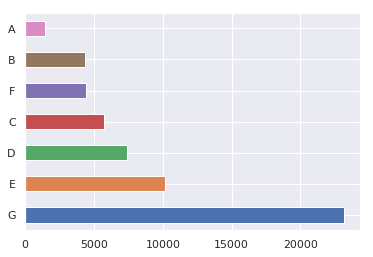

In [14]:
df.Customer_Location.dropna().value_counts().plot.barh()

The feature is categorical and we can hot encode it in the dataset.

In [22]:
df.Customer_Location = LabelEncoder().fit_transform(df.Customer_Location.astype(str))

Lets now visualize the distributions in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cb3f1d0>,
      dtype=object)

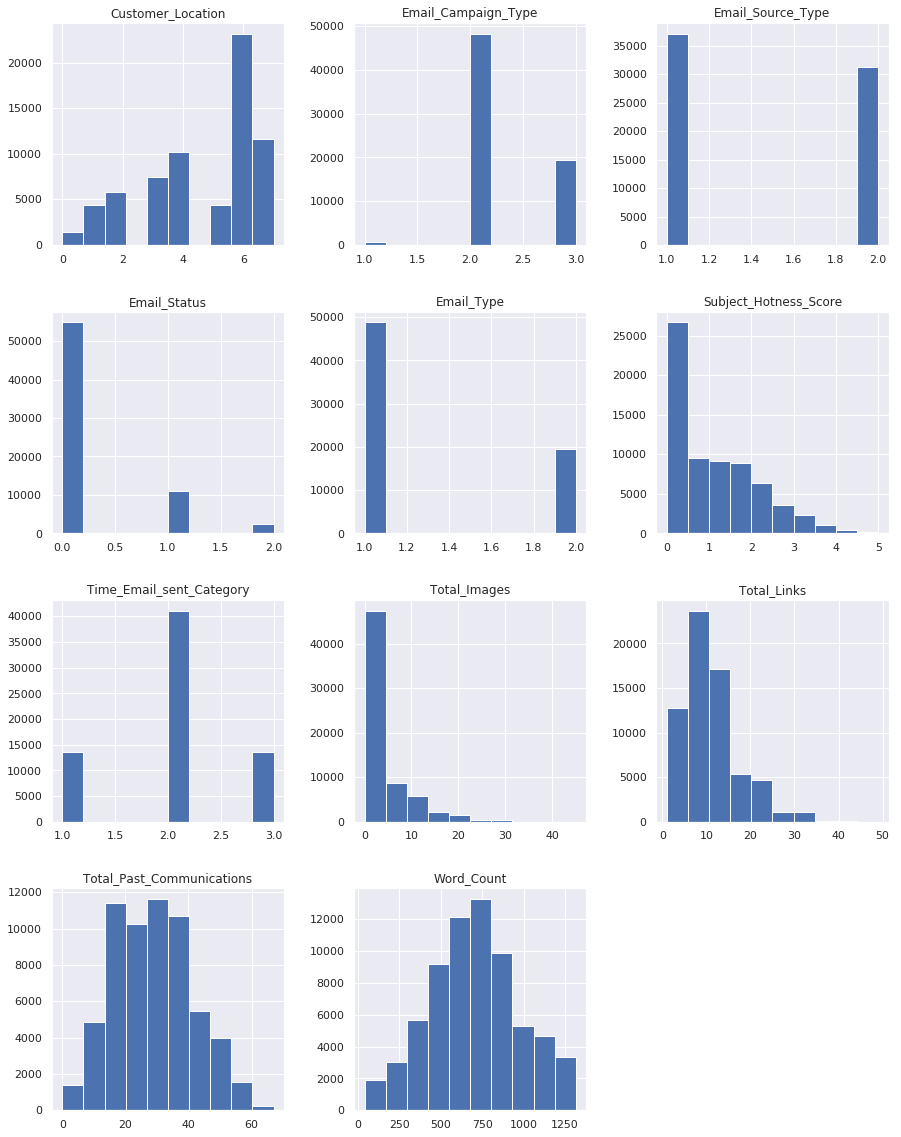

In [41]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

The above historgrams tells us that about 6 features are categorical and 'Total Past Communications' and 'Word Count' are almost normally distributed.

### Email Status

Since the source of the dataset considers _'Email Status'_ as the label column with:
- 0 - ignored
- 1 - read
- 2 - acknowledged

We will now see the proportion of these values in the dataset.

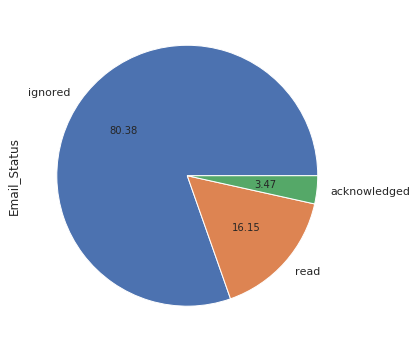

In [38]:
plt.figure(figsize=(6,6))
email_interaction_status = ["ignored", "read", "acknowledged"]
df.Email_Status.value_counts(normalize=True).plot.pie(labels = email_interaction_status, autopct='%.2f')

As the chart shows we have a very high ratio of _ignored_ responses.

### Visualizing Pearson correlation

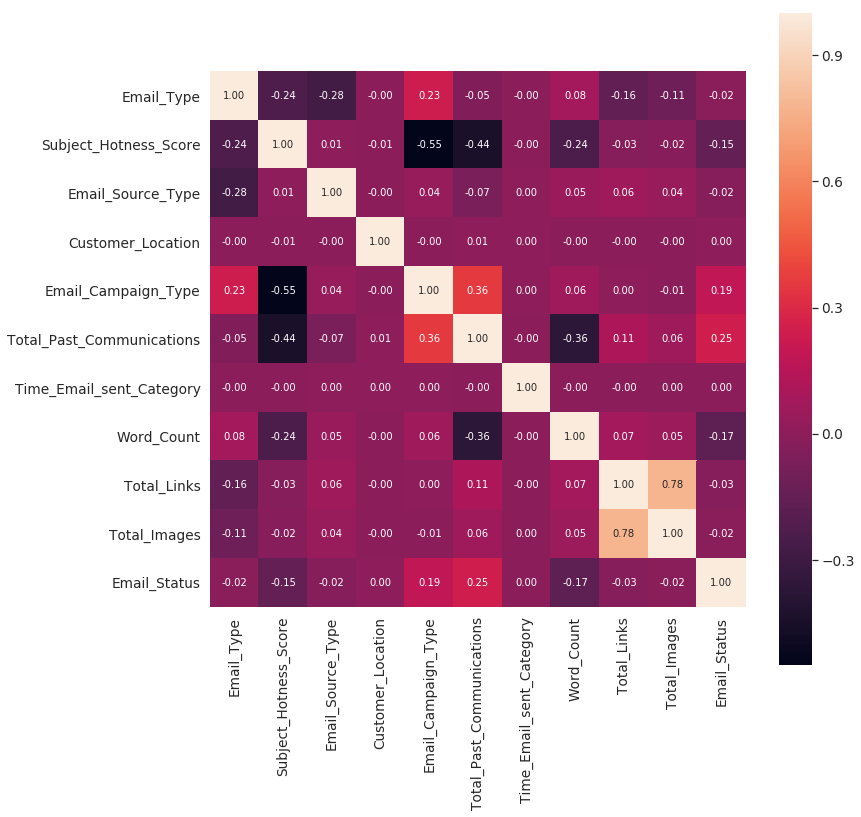

In [56]:
cor = df.corr()
sns.set(font_scale=1.25)
plt.figure(figsize=(12,12))
hm = sns.heatmap(cor, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=list(cor.columns), xticklabels=list(cor.columns))
plt.show()

Observations:
- Email_Staus (response) is co related mostly with Total_Past_Communications and Email_Campaign_Type. These two fields needs more analysis.
- Total_links and Total_images are almost related, hence we can drop one for reducing model complexity if needs be.

### Total_Past_Communications

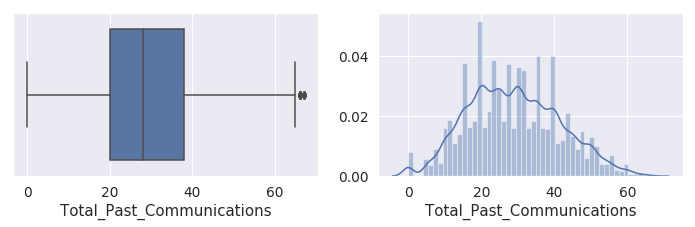

In [77]:
f, ax = plt.subplots(1, 2, figsize=(12,3))
sns.boxplot(df.Total_Past_Communications.dropna(), ax=ax[0])
sns.distplot(df.Total_Past_Communications.dropna(), ax=ax[1])

We can observe that the distirbution is mostly centered around mean and there are very few outliers.

### Past_Communications VS Email Read

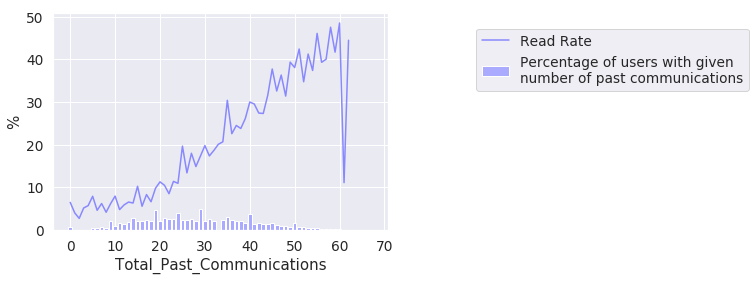

In [93]:
# Churn rate per number of service calls.
df_sub = df.dropna(subset=['Total_Past_Communications'])
ReadVsPastComm = [len(df_sub.loc[(df_sub.Total_Past_Communications == i) & (df_sub.Email_Status == 1)]) / \
                        len(df_sub.loc[(df_sub.Total_Past_Communications == i)])*100 for i in sorted(df_sub.Total_Past_Communications.unique())[1:]]

# % of users with given number of service calls. 
CommPercent = [len(df_sub.loc[df_sub.Total_Past_Communications == i])/len(df_sub)*100 for i in sorted(df_sub.Total_Past_Communications.unique())[1:]]

f, ax = plt.subplots()
ax.bar(sorted(df_sub.Total_Past_Communications.unique()[1:]), CommPercent, color="#AAAAFF", label="Percentage of users with given \nnumber of past communications")
ax.plot(ReadVsPastComm, color="#8888FF", label = "Read Rate")
ax.set_xlabel("Total_Past_Communications")
ax.set_ylabel("%")
f.legend(bbox_to_anchor=(1.75,0.9))
plt.show()

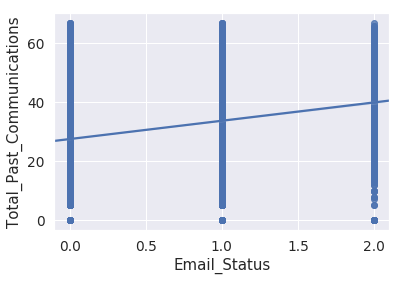

In [111]:
sns.regplot(x='Email_Status', y='Total_Past_Communications', data=df)

### Email Status VS Email_Campaign_Type 

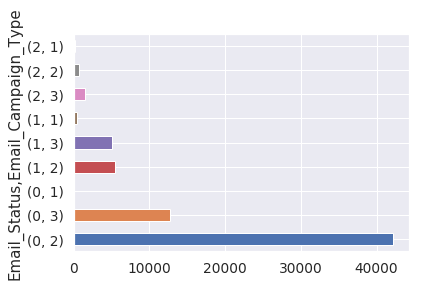

In [100]:
df.groupby("Email_Status").Email_Campaign_Type.value_counts().plot.barh()

Here we can observe that Campaign 3 has resulted in most READ and ACKNOWLEDGED emails.

### Time_Email_sent_Category

Lets explore how many time categories we have and how they are distributed

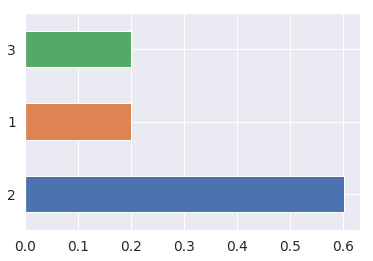

In [107]:
df.Time_Email_sent_Category.value_counts(normalize=True).plot.barh()

We can see that 1 and 3 are each 20% wile catergory 2 covers 60% of the records. Lets check what relation they have with Email's response (Email_Status)

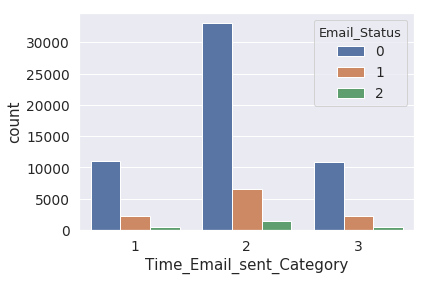

In [126]:
sns.countplot(x='Time_Email_sent_Category', hue='Email_Status', data=df)

### Email Status: Time sent vs Past Communications 

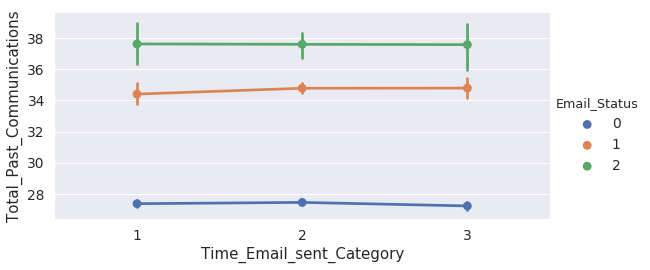

In [110]:
sns.factorplot('Time_Email_sent_Category', 'Total_Past_Communications' , hue='Email_Status', size=4, aspect=2, data=df)
plt.show()

### Email Status: Subject_Hotness_Score vs Past Communications 

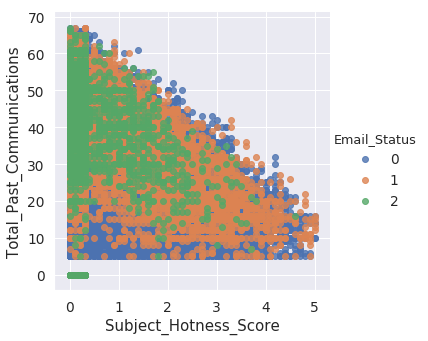

In [114]:
sns.lmplot('Subject_Hotness_Score', 'Total_Past_Communications', 
           data=df, hue='Email_Status', fit_reg=False)

We can see that with lower subject hotness score and higher past communications, the email's response of READ and ACKNOWLEDGE is high.